In [6]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [34]:
sys.path.append("../src")
from Agent import Agent
from Environment import Rectangle

In [35]:
boxsize=(2.2, 2.2)
soft_boundary=0.3

In [36]:
env = Rectangle(boxsize=boxsize, soft_boundary=soft_boundary)
walls = env.walls

In [37]:
ag = Agent(0.02, 0.02, np.array([[0.1,0.1]]))

for i in range(10000):
    ag.step(walls)

print(ag.speeds)
print(ag.hds)
print(ag.velocities)
print(ag.positions.shape)

[0.02       0.01711107 0.01259738 ... 0.00346347 0.0110886  0.00115268]
[0.02       6.2122986  0.26075914 ... 4.84798507 4.58930546 4.51106898]
[]
(10001, 2)


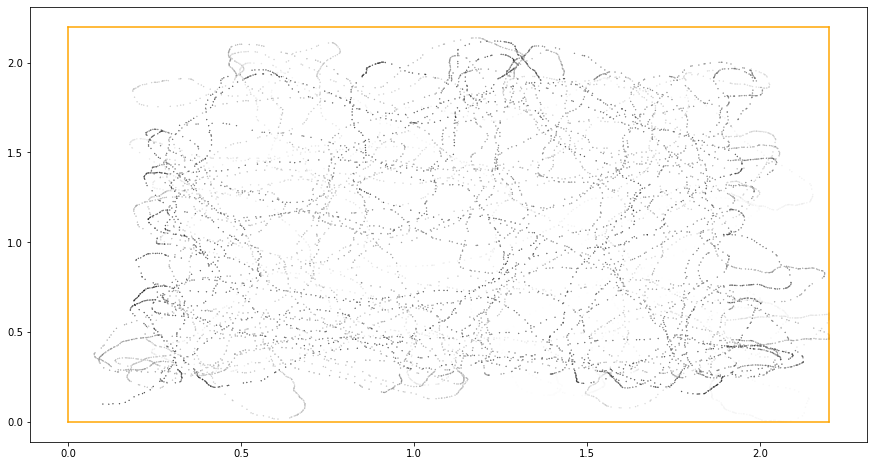

In [42]:
n=ag.positions.shape[0]

fig,axs=plt.subplots(figsize=(15,8))
c=np.zeros((n,4))
c[:,-1] = 1
c[:,:-1] = np.linspace(0,1,n)[:,None]
axs.scatter(*ag.positions.T,s=0.1,c=c)#[(0,0,0,1)]*100001)
plt.plot((0,0),(0,2.2),'orange')
plt.plot((0,2.2),(0,0),'orange')
plt.plot((2.2,2.2),(0,2.2),'orange')
plt.plot((2.2,0),(2.2,2.2),'orange')

# Testing whether numpy.append or list.append is faster

In [93]:
from ctimeit import ctimeit

In [100]:
@ctimeit
def array_cat():
    a = np.zeros(0)
    for i in range(100000):
        a = np.append(a,i)
    
    return a

array_cat()

File "<ipython-input-100-d38cc1da07f1>", line 9, function: array_cat() used <2.150149049999527> seconds


array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 9.9997e+04, 9.9998e+04,
       9.9999e+04])

In [103]:
@ctimeit
def list_cat():
    a = []
    for i in range(100000):
        a.append(i)
    
    return i
array_cat()

File "<ipython-input-103-d0af6f9751c8>", line 8, function: array_cat() used <2.2002655910000612> seconds


array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 9.9997e+04, 9.9998e+04,
       9.9999e+04])

# Conclusion: NO DIFFERENCE